In [1]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [2]:
import tweepy
import csv 

class StdOutListener(tweepy.Stream):
    def on_status(self, status):
        # saves the tweet object
        user = status.author.screen_name
        location = status.user.location
        timeTweet = status.created_at
        source = status.source
        tweet = status.text
        writer.writerow([tweet,timeTweet,user,location,source])


In [3]:
def start_streaming():
     # Opening a CSV file to save the gathered tweets
        with open("new_tweets.csv", 'w', encoding="utf-8", errors="ignore") as file:
            global writer
            writer = csv.writer(file)

            # Add a header row to the CSV
            writer.writerow(["Tweet", "Date", "User","Location","Source"])

            # Creating a Stream
            try:
                listener = StdOutListener(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'], CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])
                listener.filter(track=["#Xbox20"])  
            except KeyboardInterrupt:
                #User pressed ctrl+c or cmd+c -- get ready to exit the program
                print("- KeyboardInterrupt caught. Closing stream and exiting.")
                listener.disconnect()
                pass 


In [4]:
start_streaming()

- KeyboardInterrupt caught. Closing stream and exiting.


In [5]:
import pandas as pd

df_tweets = pd.read_csv("new_tweets.csv")


In [6]:
df_tweets.head()

,Tweet,Date,User,Location,Source
0,@BondSarah_Bond debe ser la más linda de la in...,2021-11-15 23:39:10+00:00,futuraleyenda15,"Santiago, Chile",Twitter Web App
1,RT @sonicstadium: Announced at the #Xbox20 Ann...,2021-11-15 23:39:11+00:00,Kazario_14,hell (Illinois),Twitter for Android
2,Watching the #Xbox20 on #youtube,2021-11-15 23:39:12+00:00,turasatana1,"Scotland, UK...",Twitter for iPhone
3,"RT @Xbox: 20 years on, and gaming feels just a...",2021-11-15 23:39:12+00:00,marc_morris63,NaN,Twitter for iPhone
4,"RT @Skyhammer_games: Amigos, quiero compartir ...",2021-11-15 23:39:13+00:00,Pablo_c_g,Mexico,Twitter Web App


In [7]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)


In [8]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [9]:
cleaned_tweets = []
for i in range(0,len(df_tweets['Tweet'])):
    cleaned_tweets.append(cleaning_tweets((df_tweets.Tweet[i])))
print(cleaned_tweets[0:50])

['debe ser más linda industria los videojuegos digo con respeto sosi leyendas', 'announced the xbox20 anniversary showcase just now sonic generations sonic unleashed and sonic all stars racing', 'watching the xbox20 youtube', 'years and gaming feels just good xbox20', 'amigos quiero compartir con vosotros ilusión emoción por evento xbox20 hoy hecho que halo infi', 'feel sorry for conor gallagher can see him being used these non event games but won the plane', '', 'thankful jumped xbox20', 'day the new pterodactyl feature film having the best time set the lake district with the', 'nouveau concours vous offre une manette spéciale ans xbox pour participer tweet follow', 'são vocês que fazem xbox ser tão especial xbox20', 'phantasy star universe one the first xbox games ever owned along with halo and kotor', 'added xbox 360 and original xbox games the backward compatibility library today learn more', 'team need your help years ago sunglasses launched the original xbox now sworn protect the

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["xbox20","xbox"])

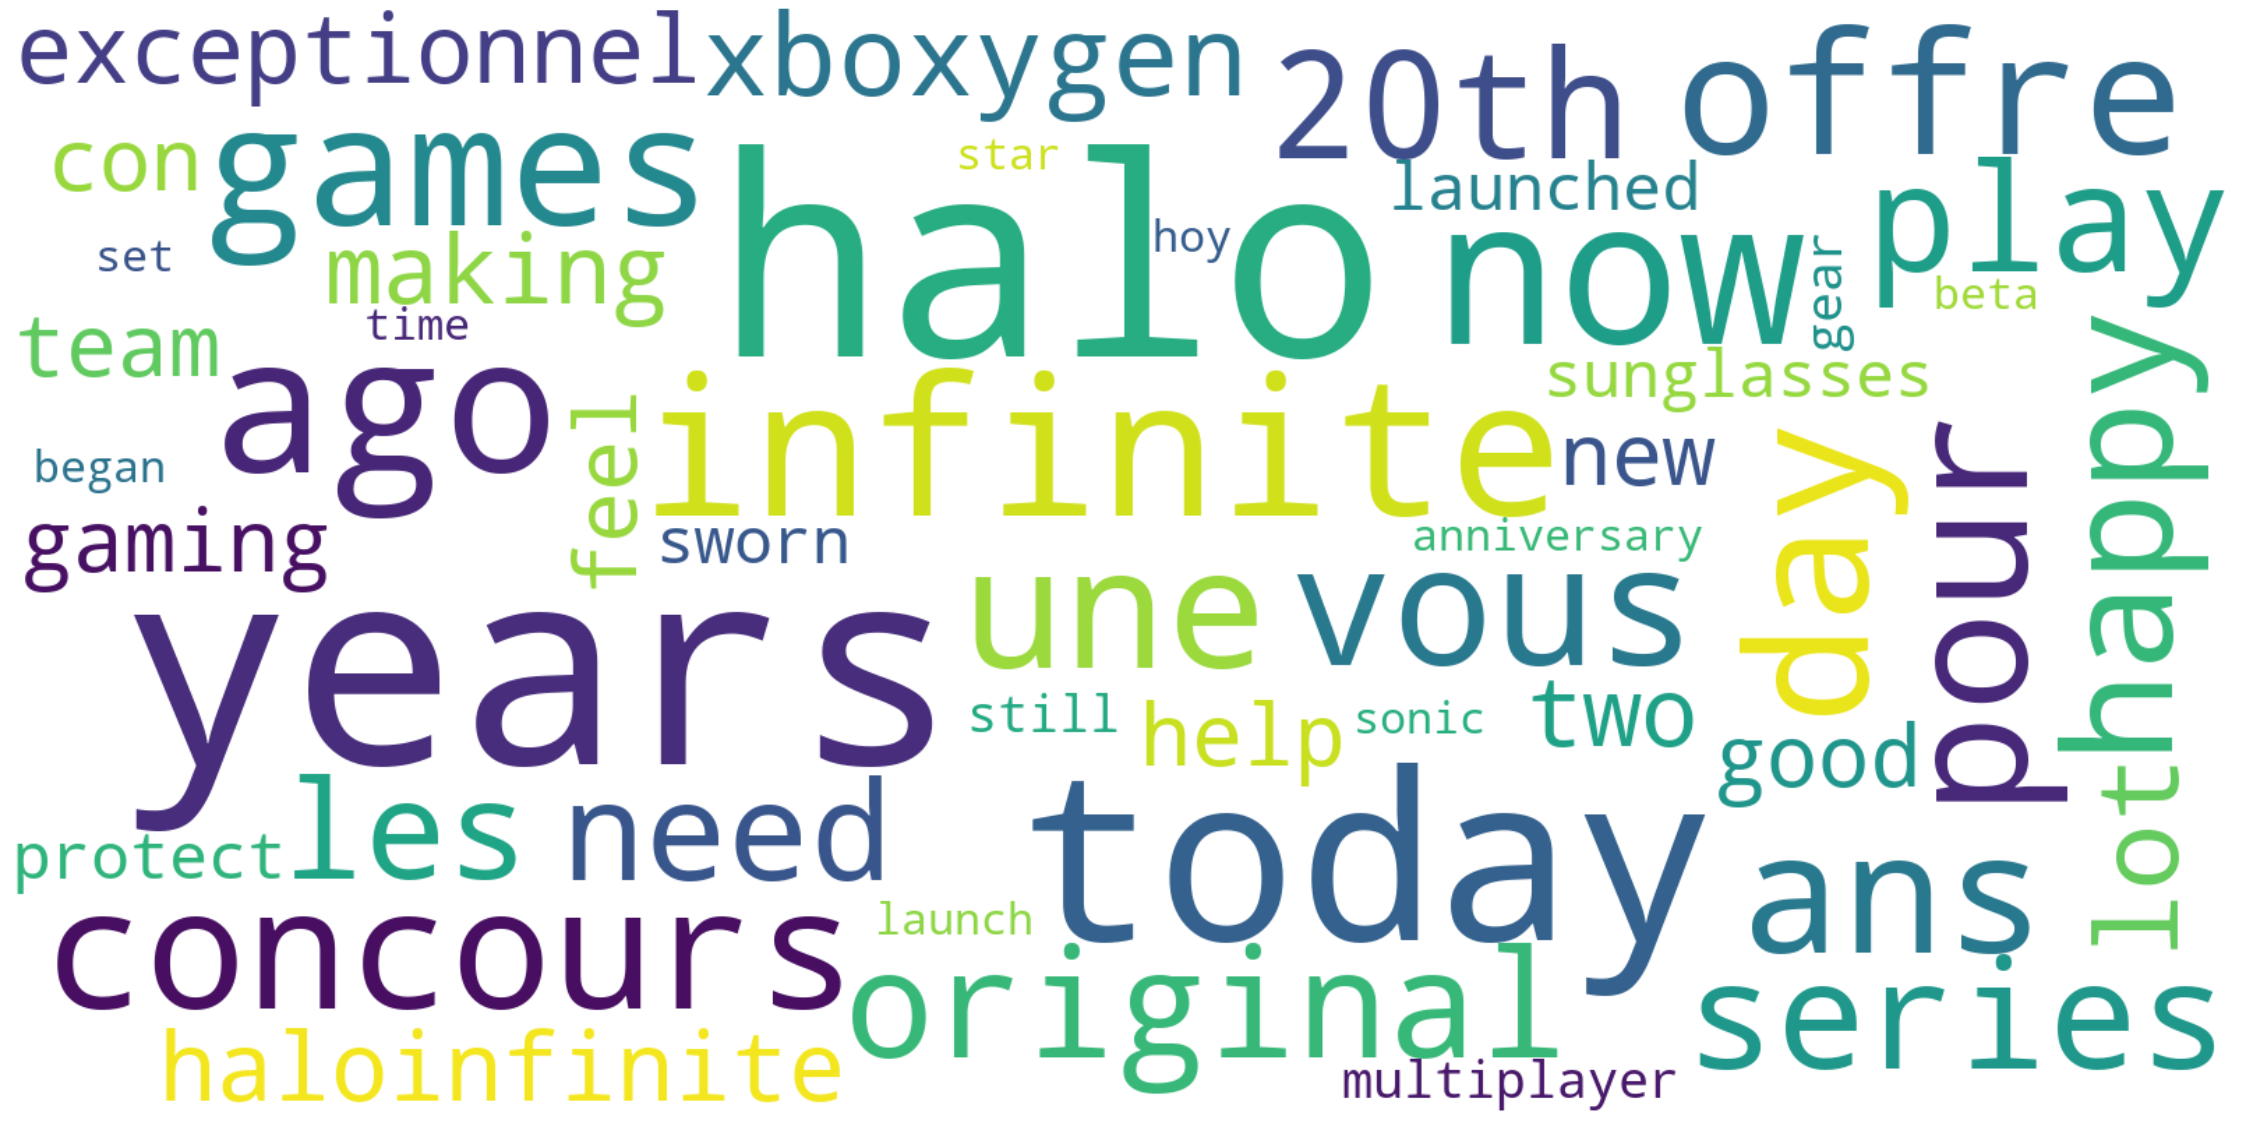

In [12]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
import numpy as np
from PIL import Image
import random

In [14]:
mask = np.array(Image.open('./images.jpg'))

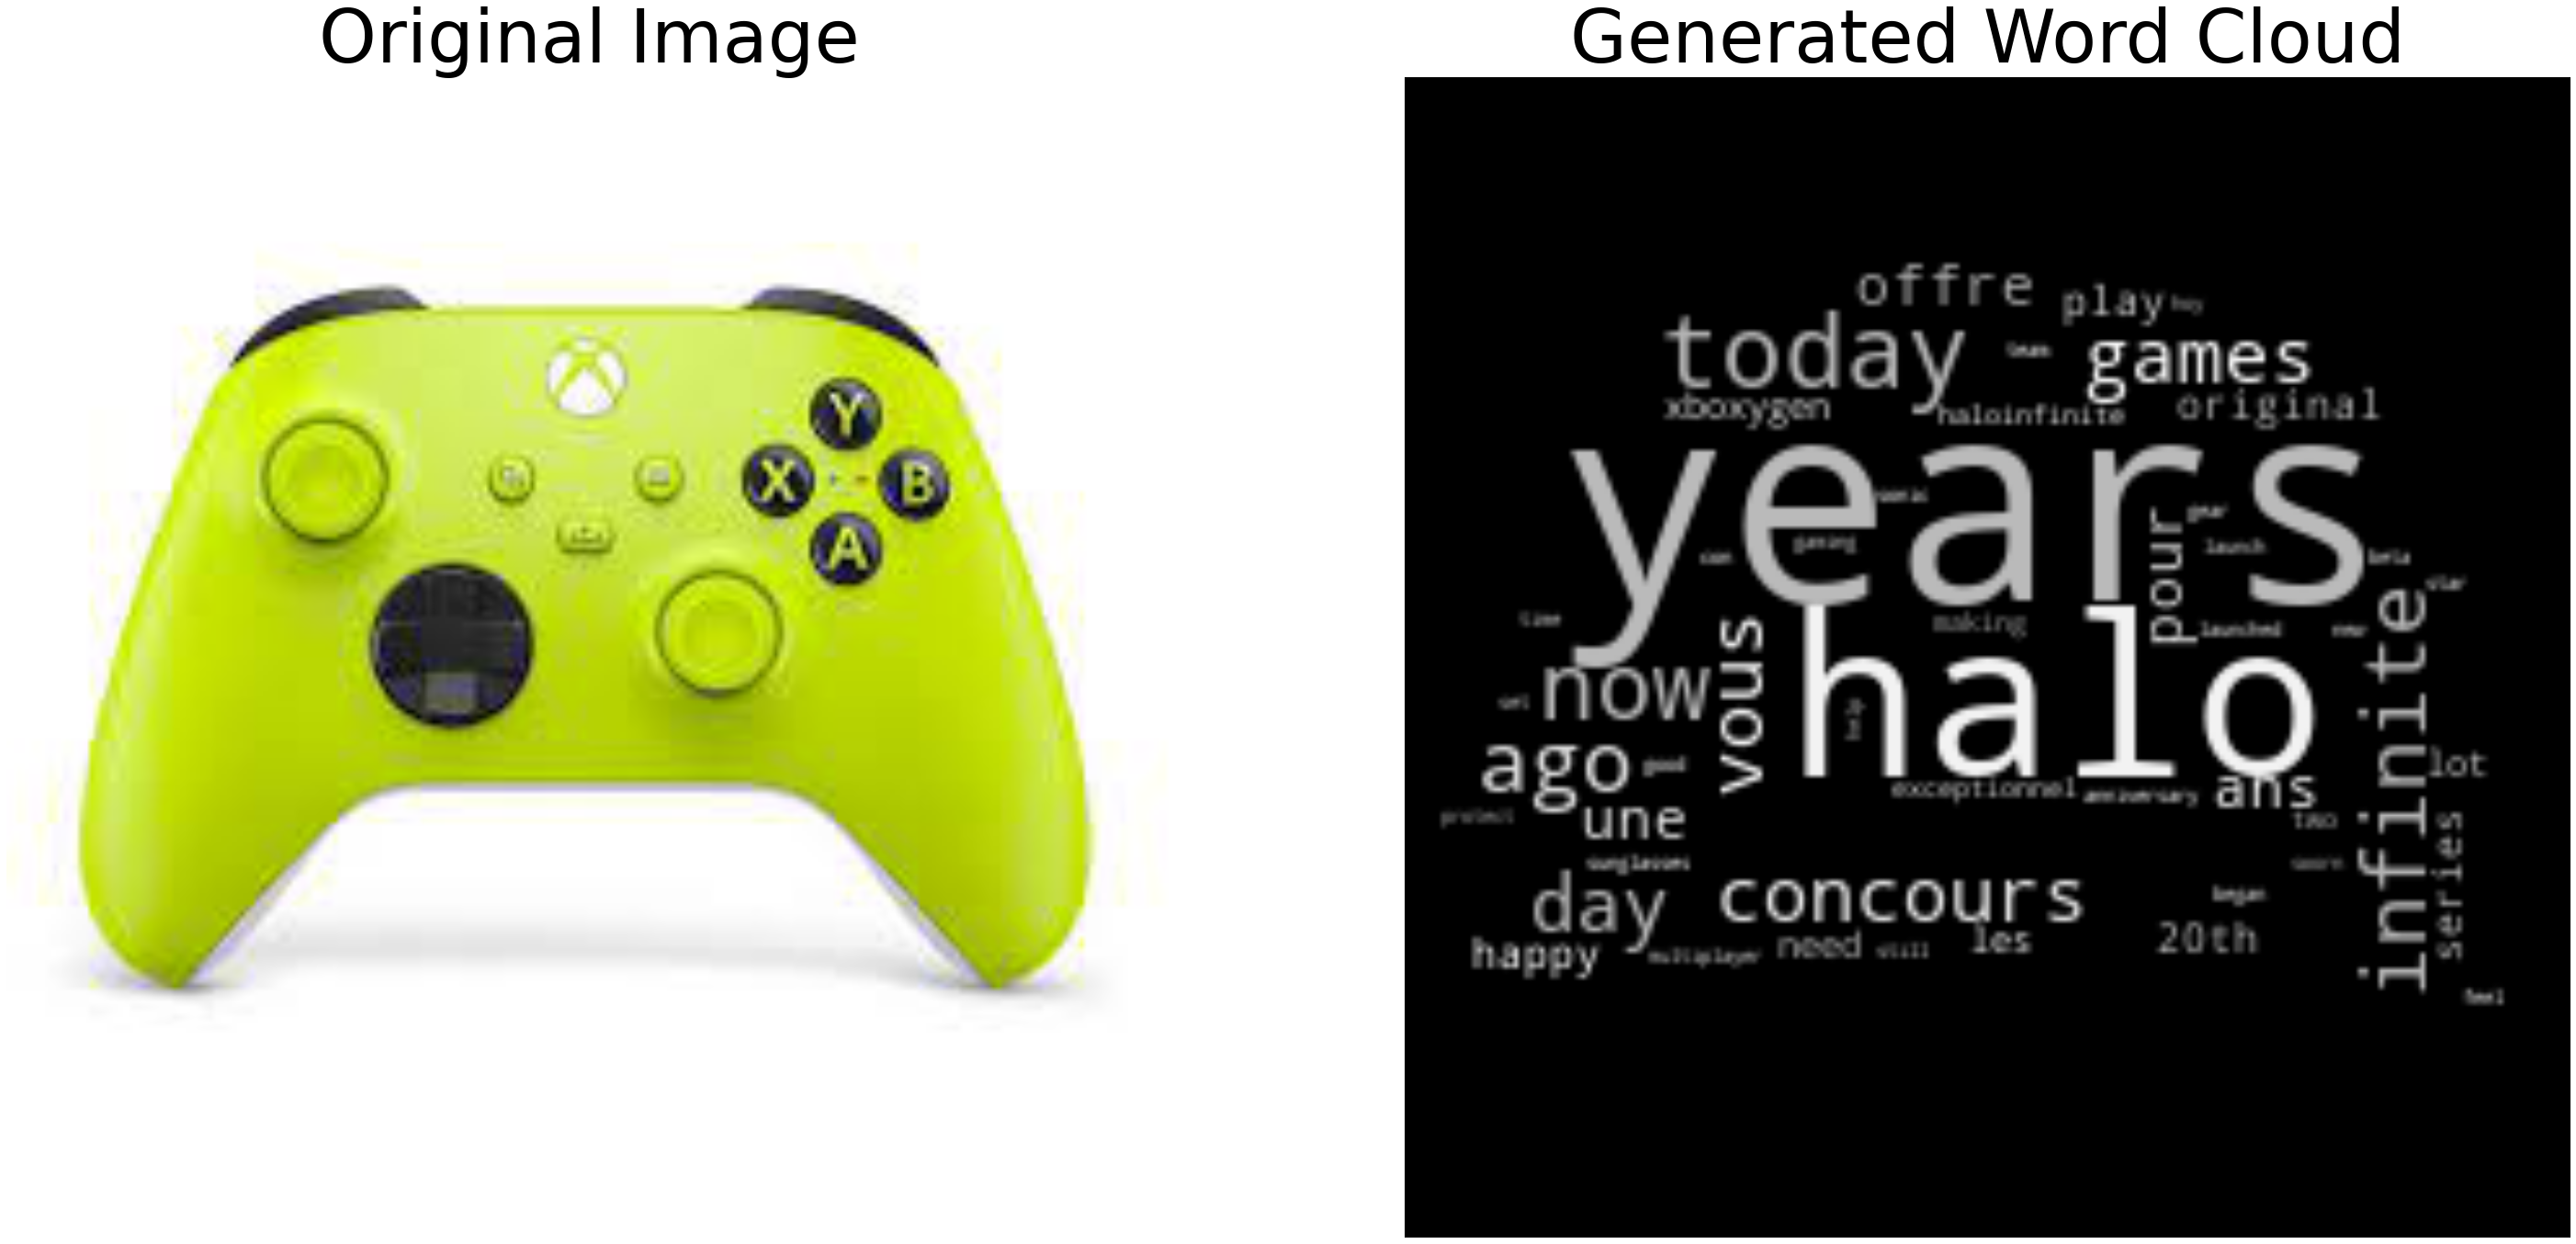

In [15]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()

In [16]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [17]:
sid.polarity_scores("I like Disney!")

{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4199}

In [18]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [19]:
calculate_sentiment("I love Disney!")

0.6696

In [20]:
df_tweets['Sentiment Score'] = df_tweets['Tweet'].apply(calculate_sentiment)
df_tweets.sort_values(by='Sentiment Score', ascending=False)[:15]

,Tweet,Date,User,Location,Source,Sentiment Score
29,RT @Xbox: “Our love for players starts with ou...,2021-11-15 23:39:28+00:00,dreegy,"Sonis, GP",Twitter for Android,0.8555
77,RT @Xbox: Wear what you play.\r\n\r\nCelebrate...,2021-11-15 23:40:02+00:00,TBoneCaponeOG,"Denver, CO",Twitter for iPhone,0.8519
60,RT @Xbox: Wear what you play.\r\n\r\nCelebrate...,2021-11-15 23:39:52+00:00,Stuntman_MIK3,Babylon 5,Twitter Web App,0.8519
79,RT @TheRock: Team @Xbox I need your help\r\n20...,2021-11-15 23:40:04+00:00,ruvenmb,"Almería, España",Twitter Web App,0.8331
42,RT @TheRock: Team @Xbox I need your help\r\n20...,2021-11-15 23:39:40+00:00,Dragonarcwar,NaN,Twitter Web App,0.8331
19,RT @TheRock: Team @Xbox I need your help\r\n20...,2021-11-15 23:39:22+00:00,dogonicee,"Madrid, España",Twitter for Android,0.8331
13,RT @TheRock: Team @Xbox I need your help\r\n20...,2021-11-15 23:39:18+00:00,rorypresley,DFW by way of WNY,Twitter for Android,0.8331
52,RT @SEGAForever: Happy 20th birthday @Xbox!\r\...,2021-11-15 23:39:47+00:00,TheNayamu,"Crépy-en-Valois, France",Twitter for Android,0.8122
75,RT @Xbox: “Unfrigginbelievable!”​\r\n\r\nPlay ...,2021-11-15 23:40:01+00:00,localTurtwig,"Tennessee, USA",Twitter for iPhone,0.8016
43,RT @SeaOfThieves: Presenting the Noble Spartan...,2021-11-15 23:39:41+00:00,Israelramirez97,"Fort Hood, TX",Twitter for iPhone,0.7717


In [22]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter

#file for output
output_file(filename="xbox.html", title="Xbox20 Twitter Visualization")

In [23]:
import math
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
p = figure(plot_height=1000, plot_width=1000, toolbar_location=None)
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, color='green')

p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'Xbox20 Tweets'
p.xaxis.axis_label = 'Dates'
p.yaxis.axis_label = 'Sentiment Score'

In [24]:
hover = HoverTool()
hover.tooltips=[
    ('Tweet', '@Tweet')
]

p.add_tools(hover)

output_notebook()

Loading BokehJS ...

In [25]:
show(p)

In [27]:
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap

output_file("xbox_colors.html", title="Visual Styling - Xbox Tweets")

In [30]:
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
mapper = linear_cmap(field_name='Sentiment Score', palette=Spectral6 ,low=-1 ,high=1)

p = figure(plot_height=500, plot_width=500, toolbar_location="below")
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'Xbox20 Tweets'
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Sentiment Score'

In [31]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Tweet: </b>
@Tweet
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...